In [3]:
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

from pprint import pprint

In [9]:
target_users = ["@BBC","@CBS","@CNN","@FoxNews","@nytimes"]
sentiments = []

for user in target_users:
    public_tweets = api.user_timeline(user,count = 100)
    counter = 1
    for tweet in public_tweets:
        raw_times=(tweet["created_at"])
        text = tweet["text"]
        results = analyzer.polarity_scores(text)
        comp=results["compound"]
        neg=results["neg"]
        pos=results["pos"]
        neu=results["neu"]
        
        
        sentiments.append({"Name":user,
                           "Time":raw_times,
                           "Tweet":text,
                           "Compound Score":comp,
                           "Positive Score":pos,
                           "Negative Score":neg,
                           "Neutral Score":neu,
                          "Tweets Ago":counter})
        counter+=1
        
        


In [16]:
df = pd.DataFrame.from_dict(sentiments)
df = df[["Tweets Ago","Name","Time","Tweet","Compound Score","Positive Score","Negative Score","Neutral Score"]]
df.to_csv("News Mood Sentiments.csv",index = False)
df.head()

,Tweets Ago,Name,Time,Tweet,Compound Score,Positive Score,Negative Score,Neutral Score
0,1,@BBC,Tue Mar 13 18:30:05 +0000 2018,Microplastics are littering riverbeds across t...,0.0000,0.000,0.000,1.000
1,2,@BBC,Tue Mar 13 17:30:06 +0000 2018,❤️💃🏻 Ballet is STILL the love of Joyce's life ...,0.6696,0.290,0.000,0.710
2,3,@BBC,Tue Mar 13 17:16:46 +0000 2018,"RT @bbcthree: ""No one needs airbags because yo...",-0.2960,0.000,0.087,0.913
3,4,@BBC,Tue Mar 13 17:13:13 +0000 2018,RT @BBCR1: Now we have a trailer for #Fantasti...,0.3182,0.103,0.000,0.897
4,5,@BBC,Tue Mar 13 17:02:28 +0000 2018,"RT @bbcwritersroom: #Networking, a necessary e...",-0.5255,0.092,0.188,0.720


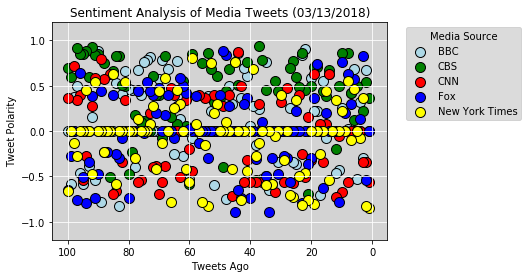

In [17]:
BBC = df[df["Name"]=="@BBC"]
CBS = df[df["Name"] == "@CBS"]
CNN = df[df["Name"]=="@CNN"]
Fox = df[df["Name"]=="@FoxNews"]
NYT = df[df["Name"]=="@nytimes"]
plt.scatter(BBC["Tweets Ago"],
            BBC["Compound Score"],marker = "o",
            facecolors = "lightblue",
            edgecolor ="black",s = 100,
            label = "BBC")
plt.scatter(CBS["Tweets Ago"],
            CBS["Compound Score"],marker = "o",
            facecolors = "green",
            edgecolor ="black",
            s = 100,
            label = "CBS")
plt.scatter(CNN["Tweets Ago"],
            CNN["Compound Score"],marker = "o",
            facecolors = "red",
            edgecolor ="black",
            s = 100,
            label = "CNN")
plt.scatter(Fox["Tweets Ago"],
            Fox["Compound Score"],marker = "o",
            facecolors = "blue",
            edgecolor ="black",
            s = 100,
            label = "Fox")
plt.scatter(NYT["Tweets Ago"],
            NYT["Compound Score"],marker = "o",
            facecolors = "yellow",
            edgecolor ="black",s = 100,
            label = "New York Times")
legend = plt.legend(loc = "upper left", bbox_to_anchor=(1.04, 1),title = "Media Source")
plt.grid(True, color = "white")
plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")))
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.xlim(105,-5,-1)
plt.ylim(-1.2,1.2)
plt.savefig("Sentiment Analysis of Media Tweets.png")
plt.show()

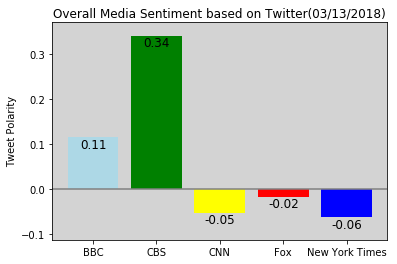

In [18]:
x_axis = np.arange(len(target_users))
avg = df.groupby("Name")['Compound Score'].mean()
labels = ["BBC","CBS","CNN","Fox","New York Times"]
colors= ["lightblue","green", "yellow", "red", "blue"]
plt.bar(x_axis,avg,tick_label = labels, color = colors)
plt.axhline(y=0, color = 'grey')
for a,b in zip(x_axis,avg):
    plt.text(a, b-0.03, '%.2f' % b, ha='center', va= 'bottom',fontsize=12)
plt.title("Overall Media Sentiment based on Twitter(%s)"% (time.strftime("%m/%d/%Y")))
plt.ylabel("Tweet Polarity")
plt.ylim(min(avg)-0.05,max(avg)+0.03)
plt.savefig("Overall Media Sentiment based on Twitter.png")
plt.show()


